# Zadanie 6-7 - klasyfikator dokumentów
## Zaimplementuj klasyfikator dokumentów

Zbiór danych:

    2225 dokumentów ze strony internetowej BBC News, odpowiadających historiom z pięciu topowych tematów opisywanych w latach 2004-2005
    5 etykiet klas (business, entertainment, politics, sport, tech)

Kroki budowy klasyfikatora:

    Podziel zbiór danych na dwie części: 50% dokumentów część treningowa, 50% dokumentów część testowa
    Utwórz wektorowe reprezentacje dokumentów stosując algorytm TF-IDF + wcześniejsza lematyzacja, usuwanie stop-words
    Wytrenuj wybrany model klasyfikatora na części treningowej zbioru danych
    Zweryfikuj jakość (trafność klasyfikacji) modelu na testowej części danych

Jako dowód wykonania zadania proszę zamieścić kod źródłowy oraz krótki raport zawierający informację o trafności klasyfikacji oraz macierz pomyłek zarówno dla części treningowej jak i testowej zbioru danych.
 
	
bbc-fulltext.zip bbc-fulltext.zip https://cez2.wi.pb.edu.pl/moodle/pluginfile.php/38964/mod_assign/introattachment/0/bbc-fulltext.zip?forcedownload=1
5 November 2019, 11:30 AM

# Take all files from the bbc dir for splitting into test/training cases

In [11]:
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import os
import spacy
from sklearn.model_selection import train_test_split
import string
from spacy.lang.en import English
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt

from typing import List, Tuple

stop_words = spacy.lang.en.stop_words.STOP_WORDS
punctuations = string.punctuation
classifier = LogisticRegression()

def clean_text(text):    
    return text.strip().lower()

parser = English()

# organizacja zbioru danych (krok wstępny przed podziałem na dane testowe i treningowe)

bbcfiles = {}
bbcfiles['business']      = os.listdir("./bbc/business")
bbcfiles['entertainment'] = os.listdir("./bbc/entertainment")
bbcfiles['politics']      = os.listdir("./bbc/politics")
bbcfiles['sport']         = os.listdir("./bbc/sport")
bbcfiles['tech']          = os.listdir("./bbc/tech")

docs : List[Tuple[str, str]] = []
for folder in bbcfiles:
    for filename in bbcfiles[folder]:
        abs_filename = os.path.abspath('bbc/'+folder+'/'+filename)
        stream = open(abs_filename, 'r', encoding='latin1') # utf8 not default?
        text = stream.read()
        stream.close();
        docs.append(( text, folder ))


In [ ]:
#Podziel zbiór danycch na dwie części 50% dokumentów część trengingowa, 50% dokumentów częsć testowa
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.5)

In [ ]:
#tf-idf
def spacy_tokenizer(sentence):    
    mytokens = parser(sentence)    
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]   #lematyzacja
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]   #usuwanie stopwords
    return mytokens
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

Logistic Regression Accuracy: 0.9712488769092543
Logistic Regression Precision: [0.94230769 0.98429319 0.98039216 0.96946565 0.98979592]
Logistic Regression Recall: [0.98       0.96410256 0.97087379 0.99607843 0.93719807]


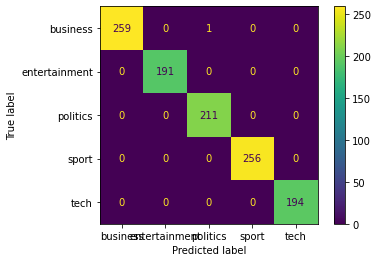

In [21]:
nlp = spacy.load("en_core_web_sm")

x = [ x[0] for x in docs ]
y = [ x[1] for x in docs ]

clearData = []
temp = []
separator = " "


class predictors(TransformerMixin):
    def transform(self, X, **transform_params):        
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfidf_vector),
                 ('classifier', classifier)])
                 
pipe.fit(X_train,Y_train)

predicted = pipe.predict(X_test)

print("Logistic Regression Accuracy:",metrics.accuracy_score(Y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(Y_test, predicted, average = None))
print("Logistic Regression Recall:",metrics.recall_score(Y_test, predicted, average = None))

summary = classification_report(Y_test, predicted)
plot = plot_confusion_matrix(pipe, X_train, Y_train)